In [41]:
import pandas as pd

df = pd.read_csv('C:\\Users\\veni_\\Desktop\DL\\Stock Price Prediction & Forecasting with LSTM Neural Networks\\MSFT.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060524,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062686,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063767,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062145,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061065,47894400
...,...,...,...,...,...,...,...
9427,2023-08-09,326.470001,327.109985,321.049988,322.230011,322.230011,22373300
9428,2023-08-10,326.019989,328.260010,321.179993,322.929993,322.929993,20113700
9429,2023-08-11,320.260010,322.410004,319.209991,321.010010,321.010010,24342600
9430,2023-08-14,321.390015,324.059998,320.079987,324.040009,324.040009,18836100


In [42]:
df = df[['Date', 'Close']] # Since we only need two columns data and close, we will remove the other columns

df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9427,2023-08-09,322.230011
9428,2023-08-10,322.929993
9429,2023-08-11,321.010010
9430,2023-08-14,324.040009


In [43]:
df['Date'] # here we can notice that the format of the date column is not date but actually it's a string that has a date
# , month and a year. We can see in the below code that it's dtype is object

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9427    2023-08-09
9428    2023-08-10
9429    2023-08-11
9430    2023-08-14
9431    2023-08-15
Name: Date, Length: 9432, dtype: object

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9432 entries, 0 to 9431
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9432 non-null   object 
 1   Close   9432 non-null   float64
dtypes: float64(1), object(1)
memory usage: 147.5+ KB


In [45]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

# with the help of this code, we can convert the string type of date to datetime. Also, there is another way of getting 
# this done and that is via pandas

# df['Date'] = pd.to_datetime(df["Date"])

datetime.datetime(1986, 3, 19, 0, 0)

In [46]:
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9427,2023-08-09,322.230011
9428,2023-08-10,322.929993
9429,2023-08-11,321.010010
9430,2023-08-14,324.040009


In [47]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\veni_\AppData\Local\Temp\ipykernel_6528\2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9427   2023-08-09
9428   2023-08-10
9429   2023-08-11
9430   2023-08-14
9431   2023-08-15
Name: Date, Length: 9432, dtype: datetime64[ns]

In [48]:
df.index = df.pop('Date') # here we are removing index and putting date column as index
df 

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2023-08-09,322.230011
2023-08-10,322.929993
2023-08-11,321.010010


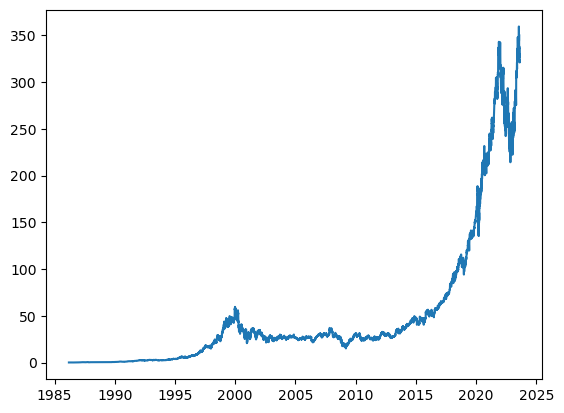

In [49]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])
# here we can see that the stock price sky rockted around 2016. Since we will using an LSTM model, we need to convert this
# into a supervised learning problem with the help of below code.

In [51]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '1986-03-18', 
                                '2016-07-15', 
                                n=3)
windowed_df


# Target-3, Target-2, Target-1 and the Target are the stock closing values from before. So, on a particular date, target is
# share value. Target-3, Target-2, Target-1 are the share prices for the 3 previous values. 

,Target Date,Target-3,Target-2,Target-1,Target
0,1986-03-18,0.097222,0.100694,0.102431,0.099826
1,1986-03-19,0.100694,0.102431,0.099826,0.098090
2,1986-03-20,0.102431,0.099826,0.098090,0.095486
3,1986-03-21,0.099826,0.098090,0.095486,0.092882
4,1986-03-24,0.098090,0.095486,0.092882,0.090278
...,...,...,...,...,...
7642,2016-07-11,51.380001,51.380001,52.299999,52.590000
7643,2016-07-12,51.380001,52.299999,52.590000,53.209999
7644,2016-07-13,52.299999,52.590000,53.209999,53.509998
7645,2016-07-14,52.590000,53.209999,53.509998,53.740002


In [52]:
# This function takes windowed_df and convert it to date_X_y, we will be getting a 3 dimensional tensor date, x and y is
# going to be an output factor.

def windowed_df_to_date_X_y(windowed_dataframe): # Converting the above windowed_df into a numpy array
  df_as_np = windowed_dataframe.to_numpy() # converting the dataeframe into a numpy  

  dates = df_as_np[:, 0] # here we are extracting dates

  middle_matrix = df_as_np[:, 1:-1] # here we extracting the 1st and the second last column.. ie Target 1, 2, 3 
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1)) # reshaping the matrix as originally it has the 
# wrong shape|| although we are using only one variable, we have 3 different values of that variable. Basically, we will
# doing univariate focasting as we are only looking at the closing value getting changed over time.

  Y = df_as_np[:, -1] # output vector    

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape   # X.shape is our input matrix, 3 because we are looking 3 steps in the past and 1 as it 
# is for only one type of variable.
# splitting the data into train, validation and testing partition .. training will train the model, the validation will
# help train the model and testing will be used to evaluate the performane of the model.

((7647,), (7647, 3, 1), (7647,))

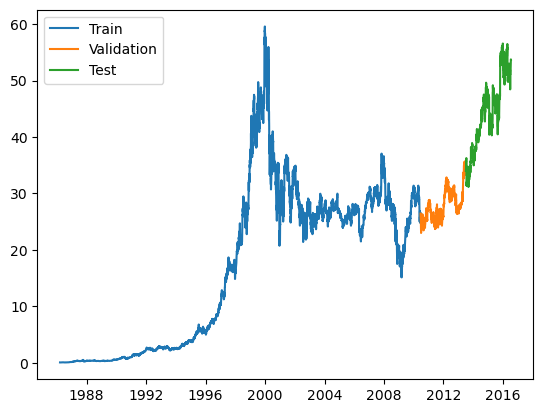

In [53]:
# We need two integers for the split
q_80 = int(len(dates) * .8) # making the training partition 80%  
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80] # here we are using first 80% of the data to train dates,
# X and y

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:] # we are giving the remaing 10% or data after 90% for testing
# purpose

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [54]:
# creatng and training our model

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam # Adam is the optimizer that we are going to use.
from tensorflow.keras import layers # so we are making a model that is sequential and built up of many layers.

model = Sequential([layers.Input((3, 1)), # specifying the input layer
                    layers.LSTM(64), # the bigger the no., more complicated the model is and it more prone to overfitting.
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)]) # since we are forcasting only one variable, we are trying to predict the next value 
# the default activation function for that is linear which is desired.

model.compile(loss='mse',  # to compile the model we need to set the loss function, and the LF that we need to minimise is
# MSE
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
192/192 [==============================] - 2s 3ms/step - loss: 110.0077 - mean_absolute_error: 4.9410 - val_loss: 0.2056 - val_mean_absolute_error: 0.3504
Epoch 2/100
192/192 [==============================] - 0s 1ms/step - loss: 0.4548 - mean_absolute_error: 0.3395 - val_loss: 0.1757 - val_mean_absolute_error: 0.3270
Epoch 3/100
192/192 [==============================] - 0s 2ms/step - loss: 0.3284 - mean_absolute_error: 0.3093 - val_loss: 0.3247 - val_mean_absolute_error: 0.4685
Epoch 4/100
192/192 [==============================] - 0s 2ms/step - loss: 0.3360 - mean_absolute_error: 0.3176 - val_loss: 0.1827 - val_mean_absolute_error: 0.3255
Epoch 5/100
192/192 [==============================] - 0s 2ms/step - loss: 0.3412 - mean_absolute_error: 0.3269 - val_loss: 0.1684 - val_mean_absolute_error: 0.3071
Epoch 6/100
192/192 [==============================] - 0s 2ms/step - loss: 0.3301 - mean_absolute_error: 0.3157 - val_loss: 0.1557 - val_mean_absolute_error: 0.2957
Epoch 7/

192/192 [==============================] - 0s 747us/step


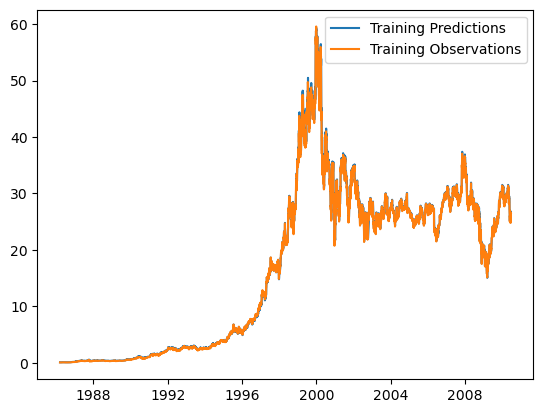

In [55]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

# Orange is the actual observed observations ie it is the trajectory of the stock price from 1986 to 2016
# the blue is what we predicted, so each time it got to the three previous and it tried to predict the next one.

24/24 [==============================] - 0s 894us/step


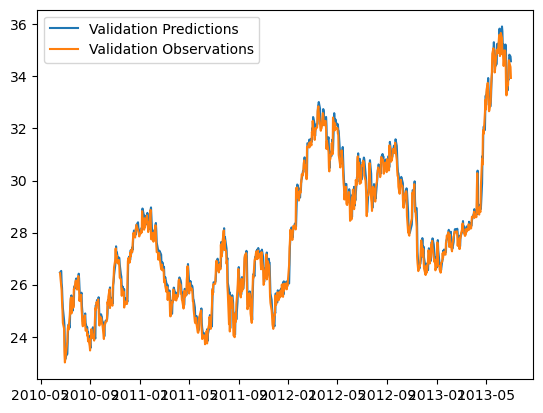

In [56]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)

plt.legend(['Validation Predictions', 'Validation Observations'])

# here our model is predicting well

24/24 [==============================] - 0s 863us/step


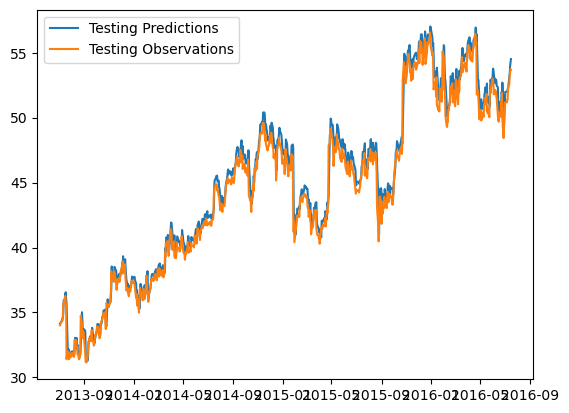

In [57]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

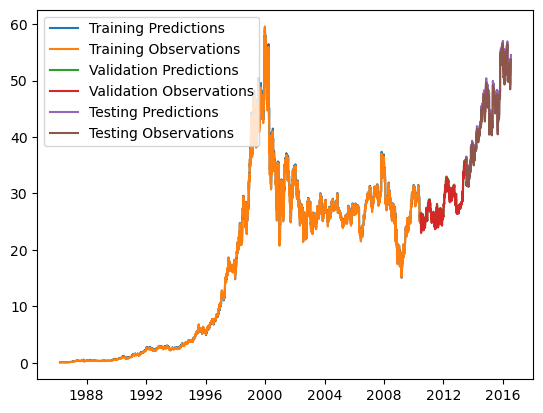

In [58]:
# here we are now going to put all the three graphs on a single graph.
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])



In [59]:
# making the model predict the future stock price 

from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test]) # these are dates for which we are actually predicting for

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 11ms/step


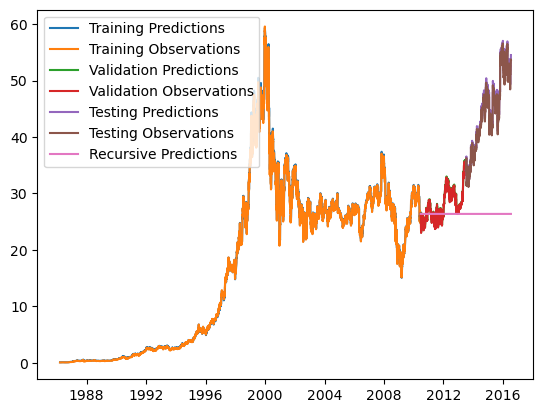

In [60]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])

In [61]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2022-08-16', 
                                '2023-08-15', 
                                n=3)
windowed_df


# Target-3, Target-2, Target-1 and the Target are the stock closing values from before. So, on a particular date, target is
# share value. Target-3, Target-2, Target-1 are the share prices for the 3 previous values. 

,Target Date,Target-3,Target-2,Target-1,Target
0,2022-08-16,287.019989,291.910004,293.470001,292.709991
1,2022-08-17,291.910004,293.470001,292.709991,291.320007
2,2022-08-18,293.470001,292.709991,291.320007,290.170013
3,2022-08-19,292.709991,291.320007,290.170013,286.149994
4,2022-08-22,291.320007,290.170013,286.149994,277.750000
...,...,...,...,...,...
246,2023-08-09,327.779999,330.109985,326.049988,322.230011
247,2023-08-10,330.109985,326.049988,322.230011,322.929993
248,2023-08-11,326.049988,322.230011,322.929993,321.010010
249,2023-08-14,322.230011,322.929993,321.010010,324.040009


In [66]:
# This function takes windowed_df and convert it to date_X_y, we will be getting a 3 dimensional tensor date, x and y is
# going to be an output factor.

def windowed_df_to_date_X_y(windowed_dataframe): # Converting the above windowed_df into a numpy array
  df_as_np = windowed_dataframe.to_numpy() # converting the dataeframe into a numpy  

  dates = df_as_np[:, 0] # here we are extracting dates

  middle_matrix = df_as_np[:, 1:-1] # here we extracting the 1st and the second last column.. ie Target 1, 2, 3 
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1)) # reshaping the matrix as originally it has the 
# wrong shape|| although we are using only one variable, we have 3 different values of that variable. Basically, we will
# doing univariate focasting as we are only looking at the closing value getting changed over time.

  Y = df_as_np[:, -1] # output vector    

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape   # X.shape is our input matrix, 3 because we are looking 3 steps in the past and 1 as it 
# is for only one type of variable.
# splitting the data into train, validation and testing partition .. training will train the model, the validation will
# help train the model and testing will be used to evaluate the performane of the model.

((251,), (251, 3, 1), (251,))

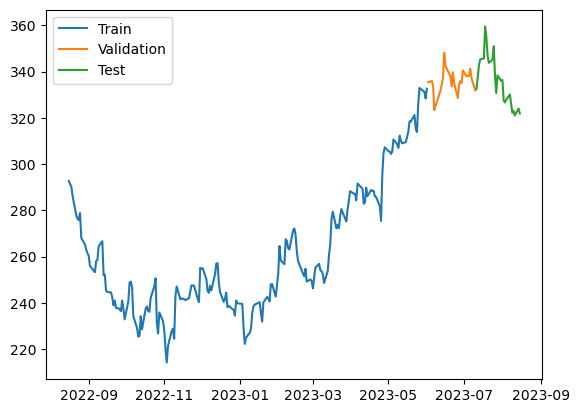

In [67]:
# We need two integers for the split
q_80 = int(len(dates) * .8) # making the training partition 80%  
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80] # here we are using first 80% of the data to train dates,
# X and y

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:] # we are giving the remaing 10% or data after 90% for testing
# purpose

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [68]:
# creatng and training our model

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam # Adam is the optimizer that we are going to use.
from tensorflow.keras import layers # so we are making a model that is sequential and built up of many layers.

model = Sequential([layers.Input((3, 1)), # specifying the input layer
                    layers.LSTM(64), # the bigger the no., more complicated the model is and it more prone to overfitting.
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)]) # since we are forcasting only one variable, we are trying to predict the next value 
# the default activation function for that is linear which is desired.

model.compile(loss='mse',  # to compile the model we need to set the loss function, and the LF that we need to minimise is
# MSE
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 1s 40ms/step - loss: 68980.6172 - mean_absolute_error: 261.2407 - val_loss: 112395.5469 - val_mean_absolute_error: 335.2115
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 68747.1016 - mean_absolute_error: 260.7928 - val_loss: 112169.4922 - val_mean_absolute_error: 334.8742
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 68573.8672 - mean_absolute_error: 260.4616 - val_loss: 111926.5703 - val_mean_absolute_error: 334.5113
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 68371.1328 - mean_absolute_error: 260.0726 - val_loss: 111635.0391 - val_mean_absolute_error: 334.0753
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 68134.8047 - mean_absolute_error: 259.6149 - val_loss: 111313.1406 - val_mean_absolute_error: 333.5932
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 67805.7031 - mean_absolute_error: 258.9794 - val_loss: 110

7/7 [==============================] - 0s 1ms/step


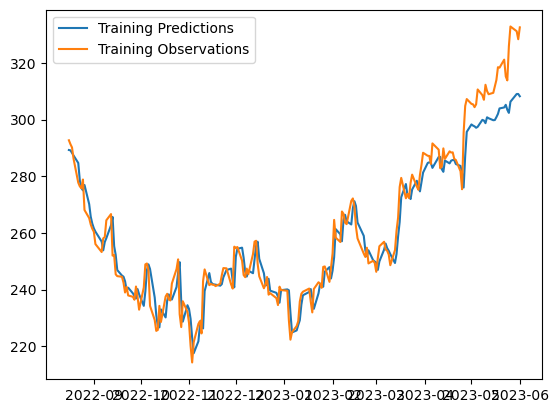

In [69]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

# Orange is the actual observed observations ie it is the trajectory of the stock price from 1986 to 2016
# the blue is what we predicted, so each time it got to the three previous and it tried to predict the next one.

1/1 [==============================] - 0s 20ms/step


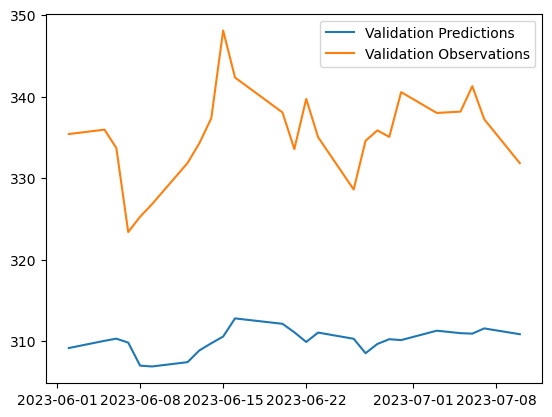

In [70]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)

plt.legend(['Validation Predictions', 'Validation Observations'])

# here our model is predicting well

1/1 [==============================] - 0s 22ms/step


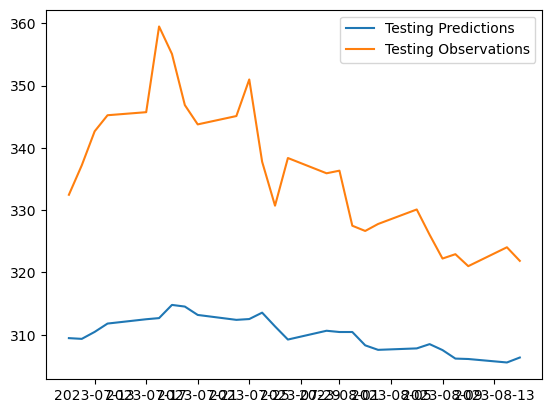

In [71]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

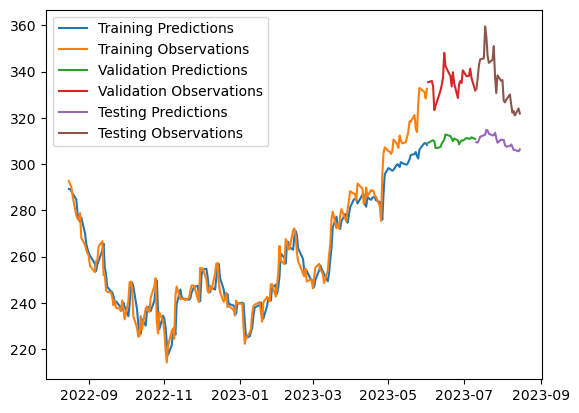

In [74]:
# here we are now going to put all the three graphs on a single graph.
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [72]:
# making the model predict the future stock price 

from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test]) # these are dates for which we are actually predicting for

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction  

1/1 [==============================] - 0s 10ms/step


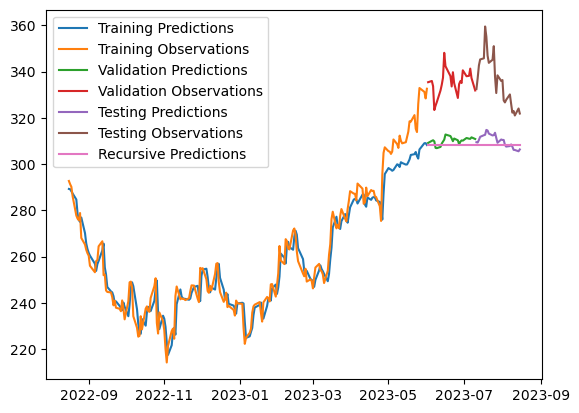

In [73]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])

# the pink line is the recursive prediction